<center><h1>Computer lab 4: Ordinary Diferential Equations (ODEs)</h1></center>
<center><h2>Part 1: Introduction to ODEs</h2></center>

_Many real-world phenomena can be modelled by ordinary differential equations (ODEs), e.g. weather forecasting or epedemic spread in a population. In this part of the lab we will look at where ODEs come from and what the mean._ <br>
<hr>

<p>First, import the <b>NumPy</b> and <b>matplotlib</b> libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt

<h3>One example: Bacterial growth</h3>

<h4>Background</h4>
<p>Suppose you keep some food in the fridge, and it’s getting old and growing bacteria. We can let $y(t)$ in this case be the number (the population) of bacteria, as a function of time, $t$. We assume here that we are not able to write down a mathematical expression for $y(t)$.
Although we can’t get derive an expression for $y(t)$, it makes sense to assume that the more bacteria there are in the food, the more bacteria are “born” and added to the population after a certain time (let’s say every hour). This means that the <i>rate of growth in the population is proportional to the size of the population</i>. Or in other words "the change in the number of bacteria at time $t$ is equal to a constant times the number of bacteria at time $t$". <br>
This translates into math as
    $$y'(t) = k \cdot y(t)$$
    where $k$ is a parameter, a growth constant. </p>
    <p>
The exact value $k$ depend on how fast the bacteria you have in your food multiply. If they double each time unit (a time unit could be one hour, let’s say), we would have $k=2$. In reality parameters are often found through empirical experiments.
    </p>
    <p>
What we just did was to derive an ordinary differential equation (ODE), that describes the growth of bacteria in your food. We have an expression for the rate of change $y'(t)$, but we are of course interested in the acual number of bacteria after a certain time. That is, we are interested in $y(t)$ at a certain time, given $y'(t)$. When we solve an ODE, we get the solution $y(t)$, either as numerical numbers, or in some cases as a mathematical expression. In this particular case the ODEs can be solved analytically, and it is possible to get the solution as a simple formula. In many cases, though, we have more complicated ODEs and it is impossible to find a mathematical expression. The only option is numerical methods.
    <p>

<h4>So, how many bacteria?</h4>
<p>To get the number of bacteria we can run a simulation and solve the ODE numerically. Let’s assume that we have 100 bacteria when we start the simulation, at time $t=0$, i.e. the so-called initial value $y(0)=100$. We try to calculate the solution $y(t)$ during 10 hours (let's say), i.e. $t$ from 0 to 10 hours. Also, let’s assume we found that the constant for the particular bacteria and tempeature we have is $k \approx ln(2) \approx 0.69315$. We can now write the problem as<br><br>
$$ \left\{ \begin{array}{l}
y'(t) = k \cdot y(t), \; \; k = 0.69315 \\
y(0) = 100, \; \; t\ge 0
\end{array} \right.
$$
<br>
The ODE is solved below using the ODE-solver <b>solve_ivp</b> in the <b>ScyPy</b>-library. Run the program!
</p>

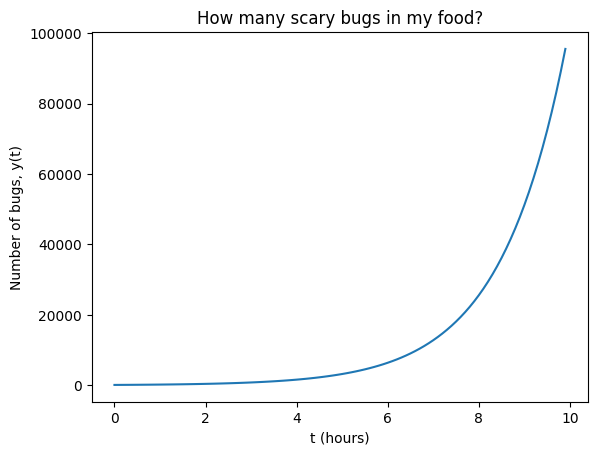

In [7]:
# Run to solve the ODE
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp


# This function defines the right-hand-side in
# the ODE, here k*y(t)
def ode_rhs(t, y, k):
    yt = k * y
    return yt


t0 = 0.0  # Start time
t1 = 10  # Final time
tspan = (t0, t1)  # Time interval
y0 = [100.0]  # Initial value, must be a vector (here 1D)

# Define parameter
k = 0.69315  # Growth constant

times = np.arange(t0, t1, 0.1)  # This define at what times the solution is stored
bacteria = solve_ivp(ode_rhs, tspan, y0, t_eval=times, args=(k,))

# Plot the solution
# The times is stored in bacteria.t and solution in bacteria.y. Bacteria.y is a vector and we only
# plot y[0] (it's only one dimension here)
plt.plot(bacteria.t, bacteria.y[0])
plt.title("How many scary bugs in my food?")
plt.xlabel("t (hours)")
plt.ylabel("Number of bugs, y(t)")
plt.show()

<p>Here we have (look in code and compare)
<ul>
<li><code>ode_rhs</code> is a Python-function defining the right-hand-side in the ODE, i.e. $k \cdot y(t)$. Must have the signature <code>ode_rhs(t,y)</code>, but here we also have one extra parameter <code>k</code> added.</li>
<li><code>tspan</code> is a tuple defining start time and final time. <code>solve_ivp</code> will compute solutions in that interval.</li>
<li><code>y0</code> is the initial value. It must be defined as an array (or list) even though it is just one element here (that is not always the case)</li>
<li><code>t_eval</code> is the time points at which the solution is stored. If you leave this out you often get a very ragged plot. Try it and see!</li>
<li><code>args</code> is a tuplet with extra parameters if thera are any. Here it is the parameter <code>k</code></li>
</ul>
</p>

<h4>A little modification in the ODE-model</h4>
<p>
Is it really realistic that the number of bacteria can grow exponentially forever, like in the plot? In reality there is a maximum population of scary bugs that your food can support. Let's call this maximum population $p_{max}$, and assume that $p_{max}=10^3$. We modify the mathematical model to<br><br>
$$ \left\{ \begin{array}{l}
y'(t) = k \cdot y(t)(1-\frac{y(t)}{p})\\
y(0) = 100, \; \; t\ge 0
\end{array} \right.
$$
<br>
Try to understand what the extra term leads to in the model. What will happen with the bacteria growth when $y(t)$ approach $p$?
</p>

<p>To solve this we can modify the code. We need to change the right-hand-side in the ODE, and also add another parameter $p$. This is done in the code below. Try to understand the changes in <code>ode_rhs</code> and <code>args</code>, and then run the code.

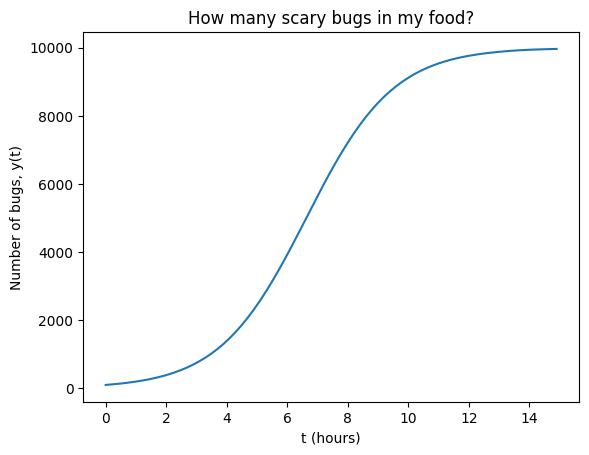

In [9]:
# Run to solve the ODE
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp


# This function defines the right-hand-side in
# the ODE, here k*y-(1-y/p)
def ode_rhs(t, y, k, p):
    yt = (k * y) * (1 - (y / p))
    return yt


t0 = 0.0  # Start time
t1 = 15  # Final time
tspan = (t0, t1)  # Time interval
y0 = [100.0]  # Initial value, must be a vector (here 1D)

# Define parameters
k = 0.69315  # Growth constant
p = 1e4  # Maximum population

times = np.arange(t0, t1, 0.1)  # This define at what times the soultion is stored
bacteria = solve_ivp(ode_rhs, tspan, y0, t_eval=times, args=(k, p))

# Plot the solution
# The times is stored in bacteria.t and solution in bacteria.y. Bacteria.y is a vector and we only
# plot y[0] (it's only one dimension here)
plt.plot(bacteria.t, bacteria.y[0])
plt.title("How many scary bugs in my food?")
plt.xlabel("t (hours)")
plt.ylabel("Number of bugs, y(t)")
plt.show()

<p>You can see that the curve flattens at around $10^3$ as it should. Also, notice how the code is structured with variables defined for start time, final time etc., and there are no numbers as input arguments in <code>solve_ivp</code>. This makes the code more easy to understand and it makes it easy change things, for example the time interval or the paremeters. Change for exampel the final time to 15 hours and $p_{max}$ to $10^4$ and run the code again.
    </p>

<h3>General conclusions</h3>
<p>
Some conclusions to be drawn from the example
<ul>
<li>A differential equation is an equation where the <i>rate of change</i> is known, i.e. $y'(t)$. We get the solution $y(t)$ by solving the ODE (here numerically, but for simple cases it can be done analytically)</li>
<li>The left-hand-side of the ODE is the derivative with respect to e.g. time, and the right-hand side is a function depending on $y(t)$, and in the general case also $t$. Therefore in a general case the ODE can be written<br><br>
$$ \left\{ \begin{array}{l}
y'(t) = f(t,y)\\
y(t_0) = y_0, \; \; t\ge t_0
\end{array} \right.
$$
<br>
To get a particular solution curve, the <i>initial value</i> $y_0$ must be defined (different initial values will give different solution curves).</li>
<li>There are often parameters (like $k$ and $p_{max}$ in the example) in the right-hand-side. In practice these are often estimated through empirical experiments. </li>
<li>Don't eat the food!</li>
</ul>
</p>